# Data Storytelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as st
from numpy.random import seed
import seaborn as sns

df_final = pd.read_pickle('NBA.pkl')

In [2]:
# Top Ten Players averaging the most points
df_final.drop_duplicates(subset=['Player'],keep='first',inplace=True)
df_final.sort_values(by='PTS',ascending=False,inplace = True)
df_final[['Player','PTS']].head(10)

,Player,PTS
9,James Harden,34.400000
27,Paul George,28.038961
32,Anthony Davis,27.986667
21,Joel Embiid,27.515625
28,Kyrie Irving,27.400000
18,LeBron James,27.363636
26,DeMar DeRozan,27.297297
25,Damian Lillard,26.986667
45,Kawhi Leonard,26.900000
50,Giannis Antetokounmpo,26.853333


In [3]:
# Top Ten Player Efficiency Rating
df_final.sort_values(by='PER',ascending = False,inplace = True)
df_final[['Player','PER']].head(10)

,Player,PER
9,James Harden,28.4
1,Stephen Curry,28.2
32,Anthony Davis,27.5
50,Giannis Antetokounmpo,27.3
45,Kawhi Leonard,26.7
15,Karl-Anthony Towns,26.5
28,Kyrie Irving,26.3
22,Nikola Jokic,26.3
21,Joel Embiid,26.1
18,LeBron James,25.6


In [4]:
# Top Ten Players in Mins Played per Game
df_final.sort_values(by='MP',ascending = False,inplace = True)
df_final[['Player','MP']].head(10)

,Player,MP
27,Paul George,36.896104
50,Giannis Antetokounmpo,36.746667
9,James Harden,36.700000
29,Jrue Holiday,36.135802
32,Anthony Davis,36.106667
16,Devin Booker,36.100000
0,Russell Westbrook,36.027397
76,Brandon Knight,35.961538
25,Damian Lillard,35.920000
26,DeMar DeRozan,35.405405


In [5]:
#Top Ten Players in Turnovers per Game
df_final.sort_values(by='TOV',ascending = False,inplace = True)
df_final[['Player','TOV']].head(10)

,Player,TOV
9,James Harden,4.500000
0,Russell Westbrook,4.452055
16,Devin Booker,3.900000
183,Trae Young,3.802469
18,LeBron James,3.581818
21,Joel Embiid,3.531250
171,Luka Doncic,3.430556
67,Zach LaVine,3.412698
76,Brandon Knight,3.403846
37,D'Angelo Russell,3.300000


James Harden is first in points, per, and turnovers. He's also top 3 in minutes played. This means James Harden mostly likely possesses the ball a lot more than other players

In [6]:
# Check columns which *aren't* numeric
for label, content in df_final.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Player
Pos_x
Team_x
Pos_y
Team_y


In [7]:
# Save Player names to merge later
df_player = df_final[['Player', 'Pos_x']].copy()

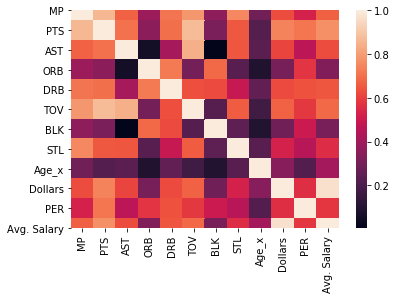

In [8]:
heat_stats= df_final[['Pos_x','MP','PTS','AST','ORB', 'DRB', 'TOV', 'BLK','STL','Age_x', 'Dollars','PER', 'Avg. Salary']]
df_data = heat_stats.corr() 
sns.heatmap(df_data)

Dollars and PER are not closely related as you would think they should. Dollars and PTS are closely related

[Text(0, 0.5, 'Average Turnovers Per Game'), Text(0.5, 0, 'Position')]

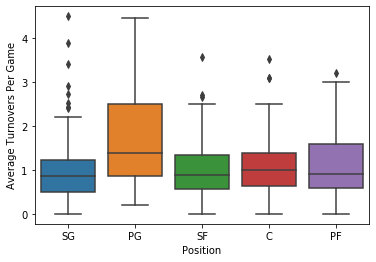

In [9]:
# Which Position is prone to turnovers
sns.boxplot(x="Pos_x", y="TOV", data=df_final).set(
    xlabel='Position', 
    ylabel='Average Turnovers Per Game')

Point guards are most likely to have more turnovers since they usually have the ball in thier hands most of the time

[Text(0, 0.5, 'Average Blocks Per Game'), Text(0.5, 0, 'Position')]

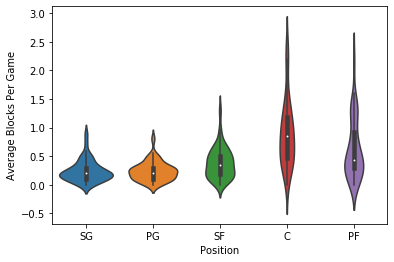

In [10]:
# What position has the most blocks
sns.violinplot(x="Pos_x", y="BLK", data=df_final).set(
    xlabel='Position', 
    ylabel='Average Blocks Per Game')

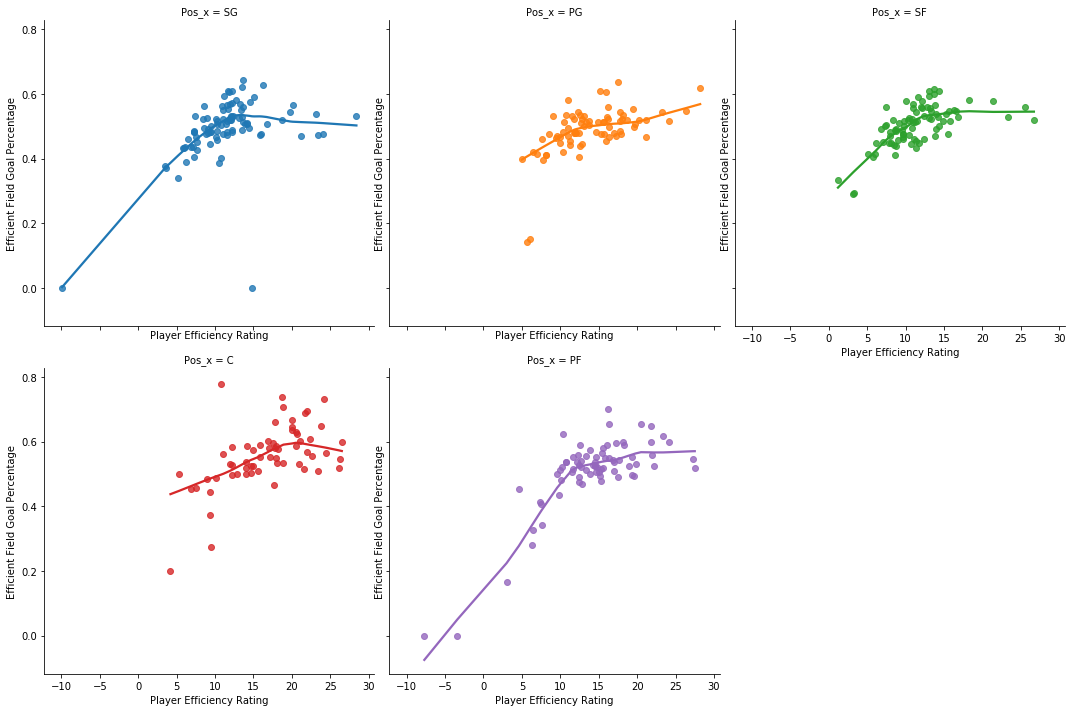

In [11]:
# Correlation of eFG% and PER
sns.lmplot(x="PER", y="eFG%",hue="Pos_x",col="Pos_x",col_wrap=3, 
           data=df_final,lowess=True).set(
    xlabel='Player Efficiency Rating', 
    ylabel='Efficient Field Goal Percentage')

Efficient scorers do not necessarily mean the player is more efficient due to that there is more to basketball than just scoring

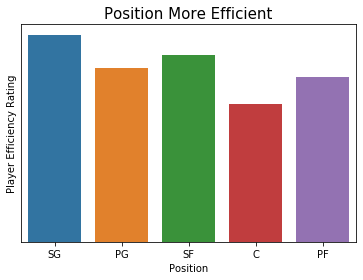

In [13]:
# Which position is more efficient
ax = sns.barplot(x="Pos_x", y="PER", data=df_final, 
                 estimator=lambda x: len(x) / len(df_final) * 100, orient='v')

ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])
plt.ylabel('Player Efficiency Rating')
_ = plt.xlabel('Position')
_ = plt.title('Position More Efficient', size=15)

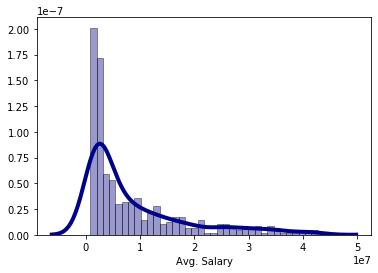

In [14]:
# Density Plot and Histogram of all players compensation
sns.distplot(df_final['Avg. Salary'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

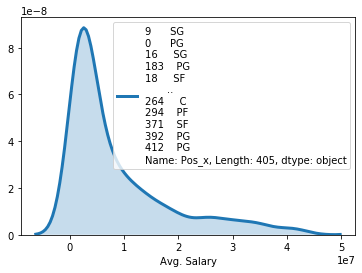

In [15]:
position = df_final['Pos_x']
sns.distplot(df_final['Avg. Salary'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = position)

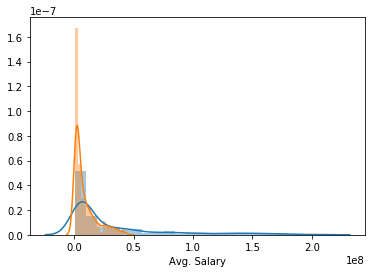

In [16]:
sns.distplot(df_final['Dollars'])
sns.distplot(df_final['Avg. Salary']);

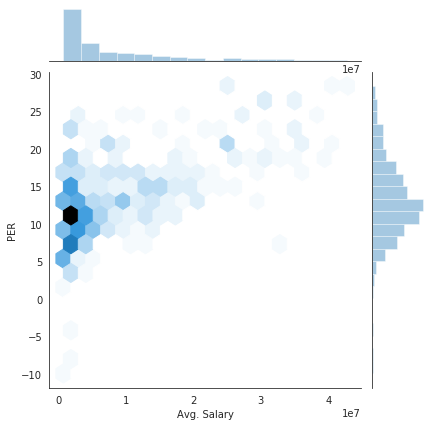

In [17]:
with sns.axes_style('white'):
    sns.jointplot("Avg. Salary", "PER", df_final, kind='hex')

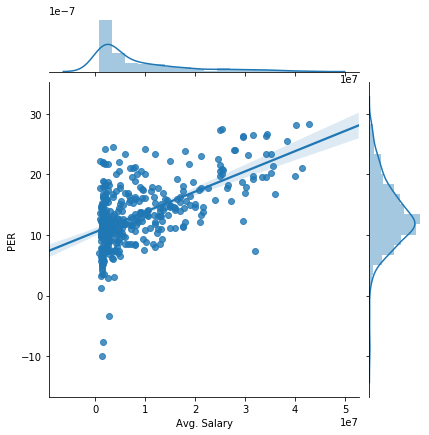

In [18]:
sns.jointplot("Avg. Salary", "PER", data=df_final, kind='reg');

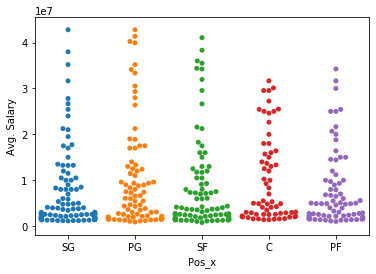

In [19]:
sns.swarmplot(x='Pos_x', y='Avg. Salary', data=df_final)